$$g(w_0,w_1) = \tanh(4w_0 + 4w_1) + max(1, .4w_0^2) + 1$$

In [80]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad 

def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)
    weight_history = []
    cost_history = []
    alpha = 0
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        grad_eval = grad_eval

        # take step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w) 
    cost_history.append(g(w))  
    return weight_history,cost_history

def norm_gradient_descent(g,alpha_choice,max_its,w,version):
    gradient = value_and_grad(g)

    weight_history = []
    cost_history = []
    alpha = 0
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        #full versus component wise
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-8*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm

        # take step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

<IPython.core.display.Javascript object>


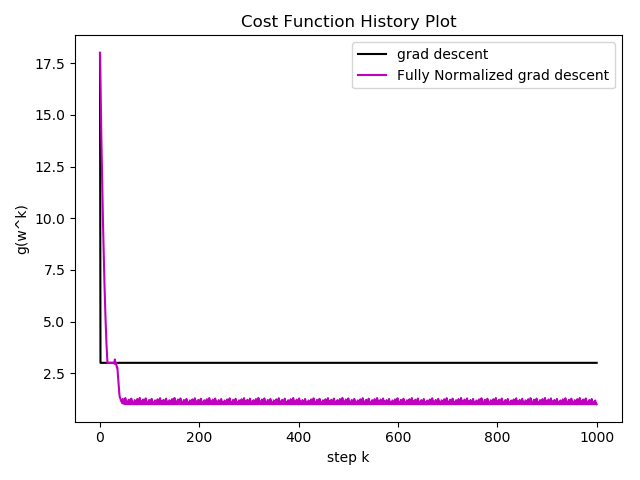

In [82]:
init_point = np.array([2.0, 2.0])
iterations = 1000
alpha_1 = 10**(-1)
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(1.0,4*w[0]**2) + 1

a1_wh, a1_ch = gradient_descent(g, alpha_1, iterations, init_point)
a2_wh, a2_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'full')

plt.plot(a1_ch, 'k-', label = 'grad descent')
plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show()